Now with tensor from torch

$y = 2 * x + 3$

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import torch as th

In [2]:
ndata = 8
x = th.rand (ndata, requires_grad=False)
print (x, x.dtype, x.shape)

tensor([ 0.9358,  0.1665,  0.6279,  0.3196,  0.0511,  0.9084,  0.3410,
         0.9417]) torch.float32 torch.Size([8])


#### Declare Variables for gradient computation

In [3]:
wTrue = th.tensor([2.], dtype=th.float32, requires_grad=True)
bTrue = th.tensor([3.], requires_grad=True)
print (wTrue, bTrue, bTrue.shape, bTrue.dtype)

yTrue = wTrue * x  +  bTrue               # all elementwise operation
print ('yTrue= ', yTrue)
print ('yTrue in numpy object = ', yTrue.data.numpy())

tensor([ 2.]) tensor([ 3.]) torch.Size([1]) torch.float32
yTrue=  tensor([ 4.8716,  3.3331,  4.2558,  3.6392,  3.1022,  4.8167,  3.6820,
         4.8835])
yTrue in numpy object =  [ 4.87159157  3.33306646  4.25578642  3.63919449  3.10224295  4.81673002
  3.68203402  4.88348341]


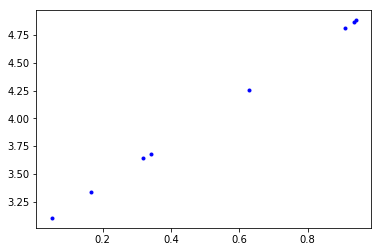

In [4]:
plt.plot (x.data.numpy(), yTrue.data.numpy(), 'b.')

In [5]:
w = th.tensor( [-3.], requires_grad=True)
b = th.tensor ([-20.], requires_grad=True)

lr = 1e-3

In [6]:
nIter = 5

for t in range (nIter):
    # forward pass
    ypred = x * w + b
    
    # compute loss
    err = ypred - yTrue
    loss = err.pow(2).sum() #th.sum( err * err )
    
    # compute gradients
    loss.backward()
    
    with th.no_grad():
        print (w.grad, w.grad.data)
        w.grad.zero_()
        b.grad.zero_()
    # 
    print (t, ' loss = ', loss, loss.item())
    

tensor([-229.7425]) tensor([-229.7425])
0  loss =  tensor(5299.9438) 5299.94384765625


RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.